# The Framingham Heart Study: 
## Using decision trees to predict the 10 year risk of developing Coronary Heart Disease

#### What is the Framingham Heart Study? 

The Framingham Heart Study was a turning point in identifying the risk factors of heart disease, and is one of the most important epidemiological studies conducted.

A lot of our present understanding of cardiovascular disease can be attributed to this study.

The Framingham Heart Study: Origin

The origin of the FHS can be attributed to the premature death of US President Franklin D. Roosevelt in the year 1945.

###### Important Milestones

Some important milestones of the Framingham Heart Study:

Smoking was found to increase the risk of CHD (1960)

Cholesterol and high BP increased the risk of CHD (1961)

Physical activity decreased the risk of CHD (1967)

High levels of HDL cholesterol was found to increase the risk of CHD (1988)

The lifetime risk of developing CHD was higher in men than in women (1999)

Obesity is a risk factor for heart failure (2002)

## Exploratory Data Analysis 

In [1]:
# Import Of Necessary Data Analysis Libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 


In [2]:
# Import Of The Dataset and Convert It to a Pandas DataFrame
df = pd.read_csv('Data/dataset.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
#Performing Summary Statistics 
def data_assessment(data):
    """
    Performs data assessment by displaying the first few rows of the data, its shape, 
    summary statistics, and information about the data types and missing values.
    """
    print("Data Assessment: \n")
    data.head()
    print("Shape:", data.shape)
    print("Summary Statistics: \n")
    data.describe()
    print("Data Types and Missing Values: \n")
    data.info()

In [5]:
data_assessment(df)

Data Assessment: 

Shape: (4238, 16)
Summary Statistics: 

Data Types and Missing Values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD    

##### !!! We Have Missing values so we need to perform  data cleaning to  the dataset 

In [6]:
#Cleaning the data 
def data_cleaning(data):
    """
    Performs data cleaning by removing duplicates and missing values.
    """
    print("Data Cleaning \n ")
    data.drop_duplicates(inplace=True)
    data.dropna(inplace=True)
    print('End of Data Cleaning ')

In [7]:
data_cleaning(df)

Data Cleaning 
 
End of Data Cleaning 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3656 non-null   int64  
 1   age              3656 non-null   int64  
 2   education        3656 non-null   float64
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   int64  
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  TenYearCHD       3656 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 485.6 KB


In [9]:
df.isnull().any()

male               False
age                False
education          False
currentSmoker      False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

##### Now we have a cleaned dataset , it's time to perform some Data Visualization 

# Exploratory Data Visualization 

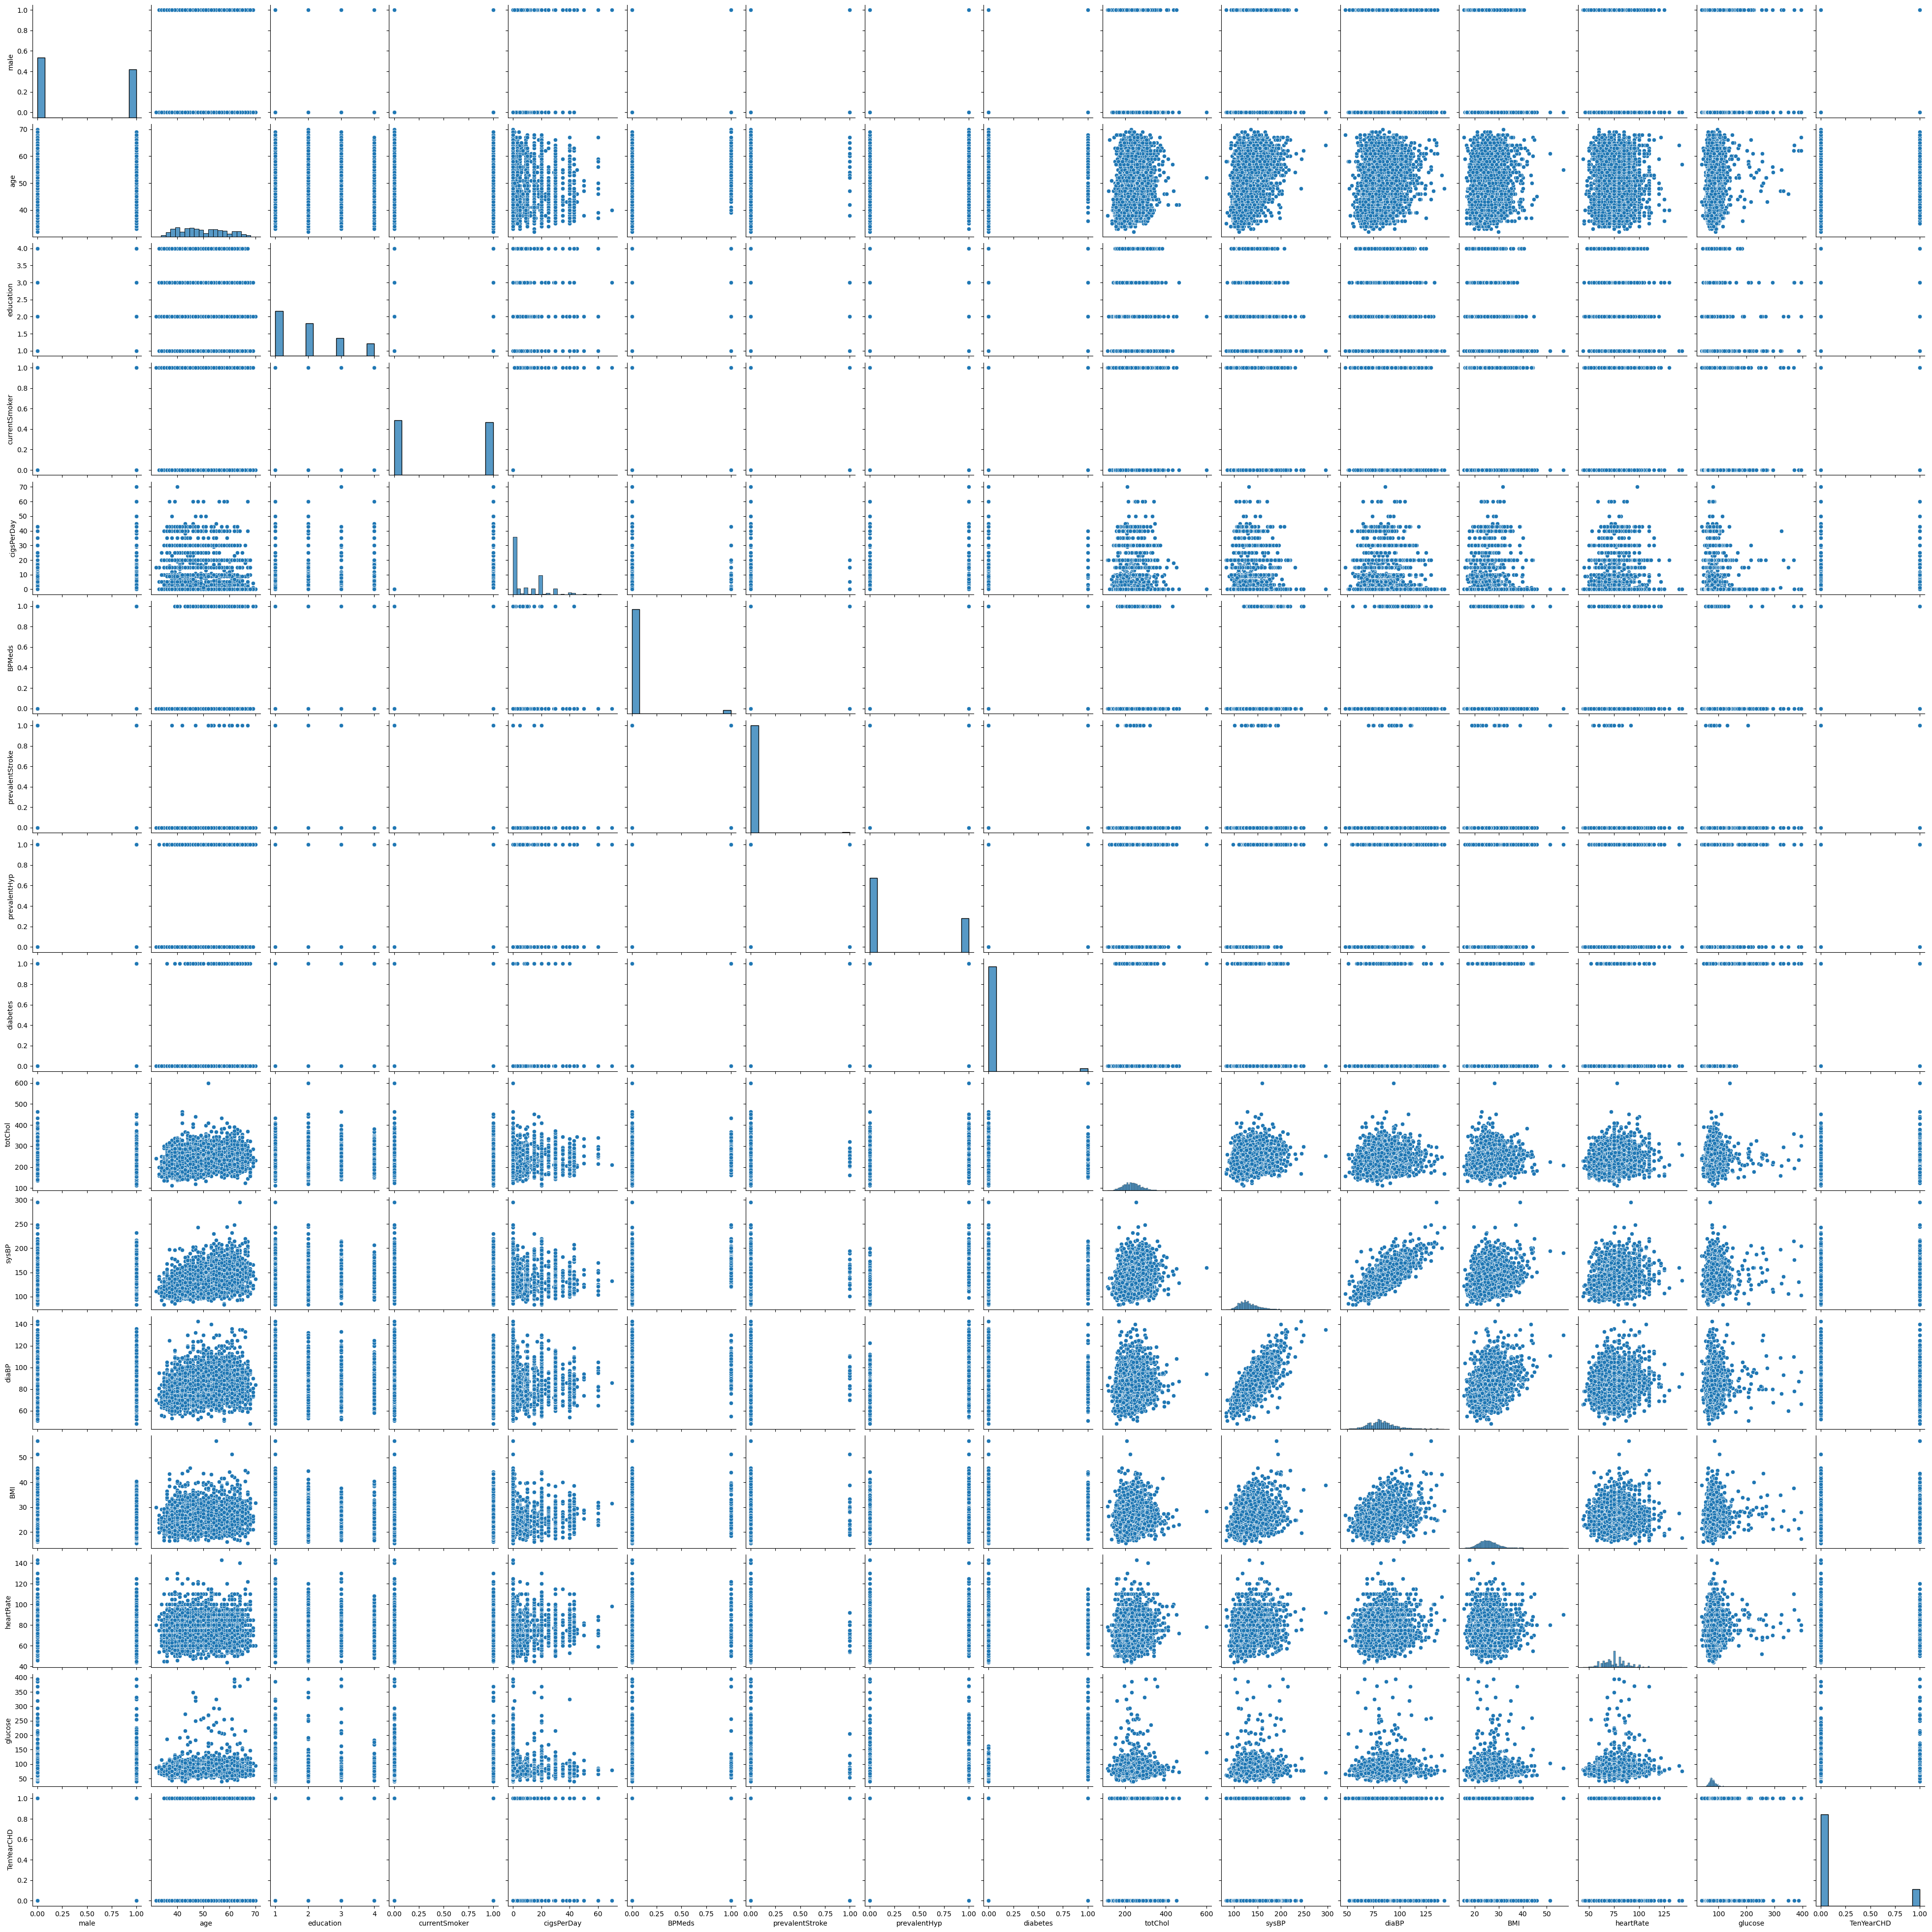

In [10]:
sns.pairplot(df)
plt.savefig("pairplot.png")

this function created a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column

### Demographic Inshights

First We will See the distribution of males and females in the dataset 

In [11]:
df['male'].value_counts()

0    2034
1    1622
Name: male, dtype: int64

We see that the number of females are greater than the number of males in the dateset .

Now We will explore  the Demographic  informations of the peoples in the dataset . 
we will start with the level of education of the participants 

<AxesSubplot: xlabel='education', ylabel='count'>

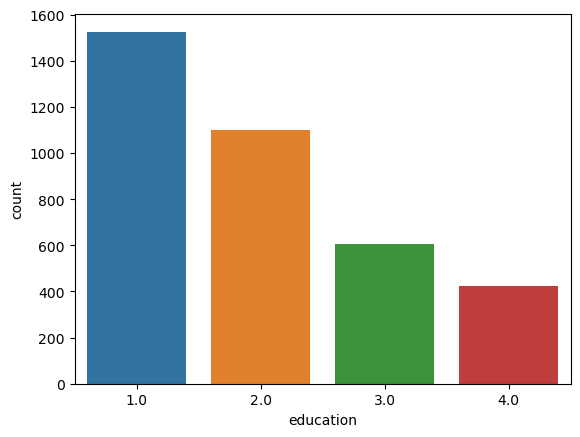

In [12]:
sns.countplot(x='education',data=df)

We see that most participants in this dataset have some form of high school education , then in the second place fewer number of them have a diploma and very few of them have already a degreee . 


Now We will explore the age of the participants :

Text(0.5, 1.0, 'Distibution of Participants Age ')

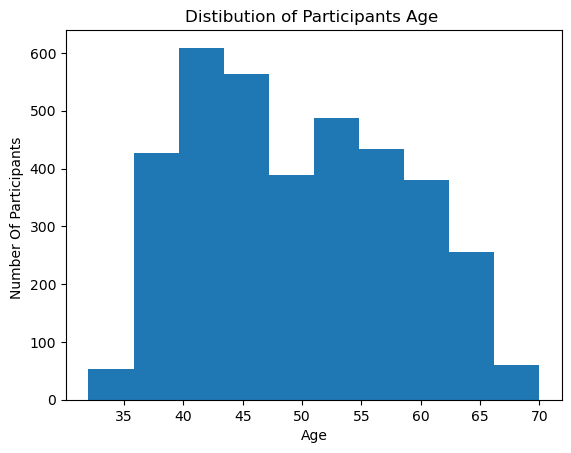

In [13]:
plt.hist(df['age'])
plt.ylabel('Number Of Participants ')
plt.xlabel('Age')
plt.title('Distibution of Participants Age ')

We Conclude From this chart that the age gap is between 40 and 55 years old

### Behavioral  Inshights

We Have extracted the demographic inshights , Now it's Time to see what we can conclude from the Behavioral Informations 

###### In the year 1960, smoking was said to increase the risk of CHD. we will try to see  this relationship with our dataset

We will explore the current situation of the smoker whether if he is still a current smoker or not ?

In [14]:
df['currentSmoker'].value_counts()

0    1868
1    1788
Name: currentSmoker, dtype: int64

we see that we have nearby values.

We will see Now The number of cigarettes smoked per day for the smokers.

In [15]:
df['cigsPerDay'].mean()

9.022155361050329

we can say that the mean number of cigarettes smoked per day is 10 

will try to see wether  there is a relationship between age of the smoker  and the ten year risk of CHD . we will sort this by the category smoker.

<AxesSubplot: xlabel='TenYearCHD', ylabel='age'>

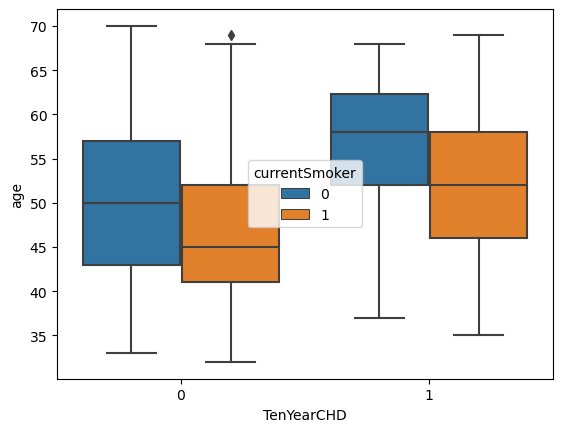

In [16]:
sns.boxplot(x='TenYearCHD',y='age',hue='currentSmoker',data=df)


we see  that older patients are more likely to develop CHD. Smokers seem to be at a larger risk of developing CHD at a younger age, as compared to non-smokers.

### Medical History Insights

Next, we  will take a look at the relationship between age, prevalent stroke, and the ten year risk of developing CHD

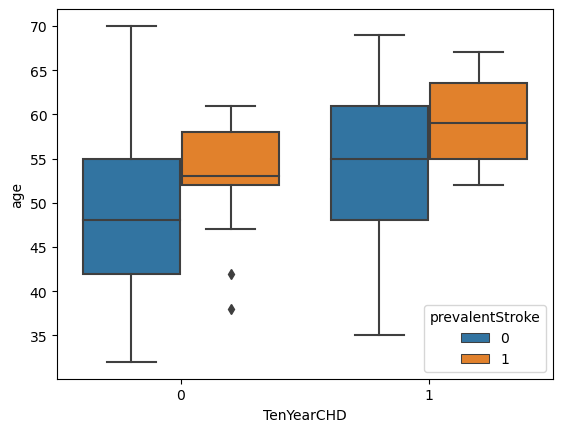

In [17]:
sns.boxplot(x='TenYearCHD',y='age',hue='prevalentStroke',data=df);


It looks as though strokes are more prevalent in participants of an older age group.

Now, we will look at the relationship between  age, diabetes, and ten year risk of developing Coronary heart disease .

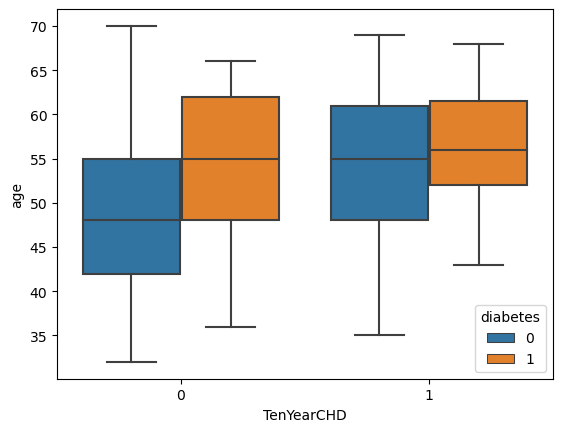

In [18]:
sns.boxplot(x='TenYearCHD',y='age',hue='diabetes',data=df);


this chart conclude  that  an older participant is more likely to have diabetes than a younger one.

In the year 1961, an increase in cholesterol levels was found to increase the risk of CHD.
we will try to find a relationship between total cholesterol levels and 10 year risk of developing coronary heart disease

<AxesSubplot: xlabel='TenYearCHD', ylabel='totChol'>

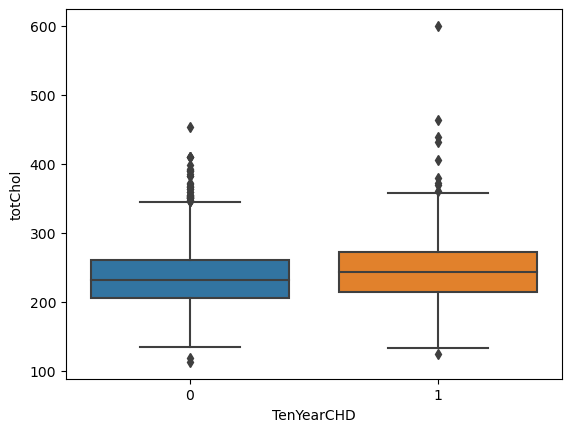

In [19]:
sns.boxplot(x='TenYearCHD',y='totChol',data=df)

We can conclude that patients with a ten year CHD risk have slightly higher cholesterol levels than patients who don’t

To Have more inshights we will take a look at both systolic and diastolic bllod pressure and visualize their relationship with ten year CHD risk

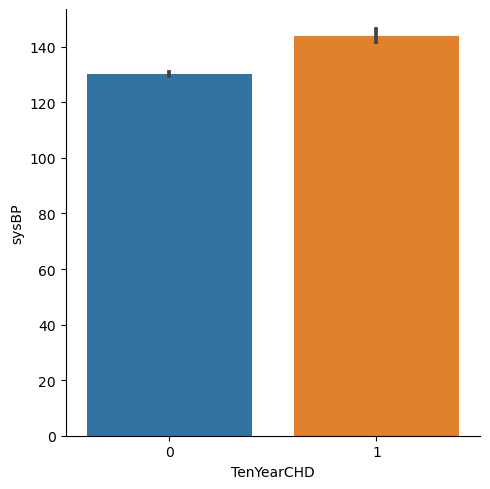

In [20]:
sns.catplot(x='TenYearCHD',y='sysBP',kind='bar',data=df)

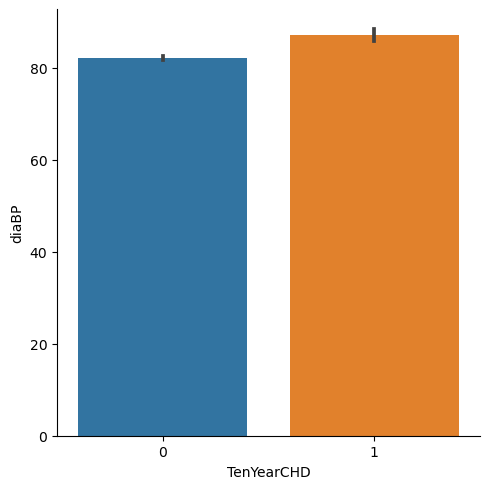

In [21]:
sns.catplot(x='TenYearCHD',y='diaBP',kind='bar',data=df)

Blood pressure does seem to be linked with coronary heart disease. Patients with a ten year CHD risk seem to have higher blood pressure than the ones who don’t.

In the year 2002, obesity was found to be a risk factor in developing CHD. I will now take a look at the relationship between BMI and the ten year risk of CHD.

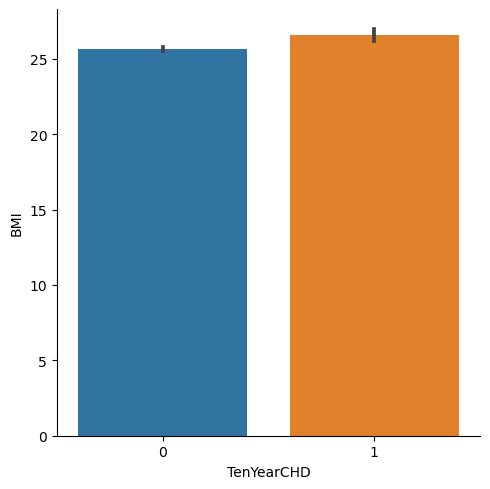

In [22]:
sns.catplot(x='TenYearCHD',y='BMI',kind='bar',data=df);

we see that Patients with CHD are seen to have slightly higher BMI than patients without.

In the year 1961, high BP was said to increase the risk of CHD. 
we will try to look at BP medications's relation ship with the 10 years risk of chd 

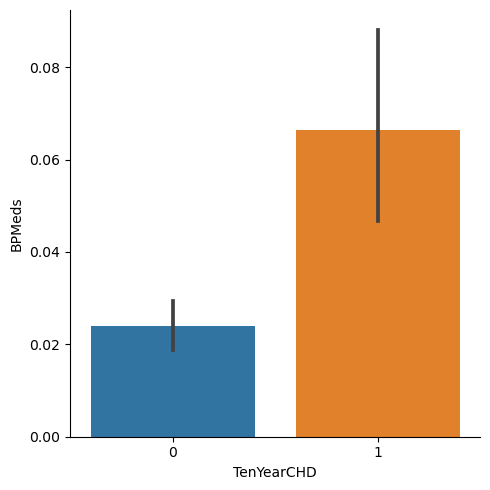

In [23]:
sns.catplot(x='TenYearCHD',y='BPMeds',kind='bar',data=df);

It's very clear that a higer level of medications can conclude to a 10 year chd risk

# Data Science

### The main purpose of our machine learning model is to predict the 10 years risk of Coronary heart disease .

First we will split our dataset into training and testing sets , but first we need to drop the TenYearCHD column from the dataset .


In [25]:
from sklearn.model_selection import train_test_split
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [28]:
y = df['TenYearCHD']
X = df.drop('TenYearCHD',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35)


The dataset it unbalanced, and more than 80% of the data is of participants who don't have a ten year CHD risk. To overcome this, I did both; oversampling and undersampling. Then, I created a pipeline for a decision tree classifier.

In [29]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over,y_over,test_size=0.35)

In [30]:
steps = [('under', RandomUnderSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)

### Fitting the data to the pipeline

In [31]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('under', RandomUnderSampler()),
                ('model', DecisionTreeClassifier())])

### Making predictions on test data

In [32]:
pipepred = pipeline.predict(X_test)

### Evaluating the model

In [33]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test,pipepred))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      1090
           1       0.84      0.98      0.90      1080

    accuracy                           0.90      2170
   macro avg       0.91      0.90      0.90      2170
weighted avg       0.91      0.90      0.90      2170



In [34]:
accuracy_score(y_test,pipepred)

0.895852534562212

The model has high precision and recall for both outcomes, and has an accuracy of 0.90

# And that’s it! We have successfully built a decision tree classifier to predict a patient’s 10 year risk of Coronary heart disease 